<a href="https://colab.research.google.com/github/RobSpiewakowski/nauka-data-science/blob/main/skrypty-colab/%C4%86wiczenia_podstawy_statystyki_opisowej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Podstawy statystyki opisowej:

In [ ]:
# Wczytywanie danych:
import pandas as pd

dane = pd.read_csv("https://akademiadatascience.s3-eu-west-1.amazonaws.com/materialy/sds/modul3/sprzedaz.csv")
print(dane.shape)
dane.sample(5) # wyświetla 5 losowych wierszy

(1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
241,448-81-5016,A,Yangon,Normal,Male,Health and beauty,59.77,2,5.9770,125.5170,3/11/2019,12:01,Credit card,119.54,4.761905,5.9770,5.8
857,748-45-2862,A,Yangon,Member,Female,Home and lifestyle,28.31,4,5.6620,118.9020,3/7/2019,18:35,Cash,113.24,4.761905,5.6620,8.2
752,807-14-7833,A,Yangon,Member,Female,Electronic accessories,17.42,10,8.7100,182.9100,2/22/2019,12:30,Ewallet,174.20,4.761905,8.7100,7.0
862,152-03-4217,B,Mandalay,Normal,Female,Home and lifestyle,11.28,9,5.0760,106.5960,3/17/2019,11:55,Credit card,101.52,4.761905,5.0760,4.3
236,211-30-9270,C,Naypyitaw,Normal,Male,Health and beauty,17.41,5,4.3525,91.4025,1/28/2019,15:16,Credit card,87.05,4.761905,4.3525,4.9


In [ ]:
# Zmiana formy daty i czasu: (analogicznie do przekształcenia z int do float)
dane["Date"] = pd.to_datetime(dane["Date"])
dane["Time"] = pd.to_datetime(dane["Time"])
print(dane["Date"][0])
print(dane["Time"][0])

2019-01-05 00:00:00
2021-04-23 13:08:00


In [ ]:
# Krótki opis kolumn:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [ ]:
# Krótkie podsumowanie:
dane.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
# Wstępna analiza:
{
    "liczba miast": dane["City"].nunique(),
    "liczba oddziałów": dane["Branch"].nunique(),
    "typy klientów": dane["Customer type"].nunique(),
    "metody płatności": dane["Payment"].nunique(),
    "liczba unikalnych zamówień": dane["Invoice ID"].nunique(),
    "liczba sprzedanych produktów": dane["Quantity"].sum(),
    "sumaryczna sprzedaż": dane["Total"].sum().round(2),
    "pierwsza data sprzedaży": str(dane["Date"].min()),
    "ostatnia data sprzedaży": str(dane["Date"].max())
}

{'liczba miast': 3,
 'liczba oddziałów': 3,
 'liczba sprzedanych produktów': 5510,
 'liczba unikalnych zamówień': 1000,
 'metody płatności': 3,
 'ostatnia data sprzedaży': '2019-03-30 00:00:00',
 'pierwsza data sprzedaży': '2019-01-01 00:00:00',
 'sumaryczna sprzedaż': 322966.75,
 'typy klientów': 2}

In [ ]:
# Tworzenie nowych zmiennych daty i czasu:
# Dzięki temu będziemy mogli, np. śledzić zależność sprzedaży od dnia tygodnia lub godziny
dane["month"] = dane["Date"].dt.month
dane["week_day"] = dane["Date"].dt.dayofweek
dane["hour"] = dane["Time"].dt.hour

dane.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,week_day,hour
666,779-42-2410,B,Mandalay,Member,Male,Food and beverages,57.74,3,8.661,181.881,2019-02-20,2021-04-23 13:06:00,Ewallet,173.22,4.761905,8.661,7.7,2,2,13
55,399-46-5918,C,Naypyitaw,Normal,Female,Electronic accessories,85.98,8,34.392,722.232,2019-02-28,2021-04-23 19:01:00,Cash,687.84,4.761905,34.392,8.2,2,3,19
966,558-60-5016,A,Yangon,Normal,Female,Home and lifestyle,33.30,9,14.985,314.685,2019-03-04,2021-04-23 15:27:00,Ewallet,299.70,4.761905,14.985,7.2,3,0,15
974,744-82-9138,C,Naypyitaw,Normal,Male,Fashion accessories,86.13,2,8.613,180.873,2019-02-07,2021-04-23 17:59:00,Cash,172.26,4.761905,8.613,8.2,2,3,17
667,190-14-3147,B,Mandalay,Normal,Female,Health and beauty,17.97,4,3.594,75.474,2019-02-23,2021-04-23 20:43:00,Ewallet,71.88,4.761905,3.594,6.4,2,5,20


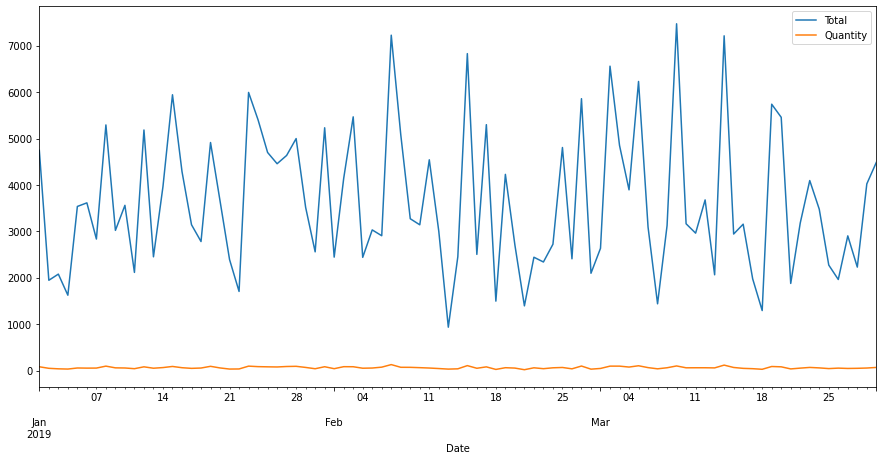

In [ ]:
# Teraz będziemy rzeźbić wizualizacje:
# import bibliotek:
import numpy as np
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

mpl.rcParams["figure.figsize"] = (15, 7)

# Zmiana indeksu na datę:
dane.index = dane["Date"]

# Rzeźbimy wykres: zależność liczby sprzedanych produktów oraz ich wartości od czasu:
dane[["Total", "Quantity"]].resample("D").agg(np.sum).plot(kind = "line")

# Składnia: zestaw danych ze wskazaniem serii.na osi mają być dni.agreguj(suma).rodzaj wykresu
# Wszystke wartości zostały zsumowane dziennie

In [ ]:
# Średnia wysokość rachunku wg płci:
dane.groupby("Gender").agg(dict(Total = "mean"))
# Składnia: dane.grupuj według płci.agreguj wartość całkowita = średnia

,Total
Gender,
Female,335.095659
Male,310.789226


In [ ]:
# Średni rating wg oddziału:
dane.groupby("City").agg(dict(Rating = "mean"))

,Rating
City,
Mandalay,6.818072
Naypyitaw,7.072866
Yangon,7.027059


In [ ]:
# Podział próbki wg płci. Robimy opis próbek zgrupowanych wg płci:
dane.groupby("Gender").describe()

Unit price                               ...  hour                  
            count       mean        std    min  ...   25%   50%   75%   max
Gender                                          ...                        
Female      501.0  55.263952  27.194037  10.16  ...  12.0  14.0  18.0  20.0
Male        499.0  56.081944  25.794145  10.08  ...  12.5  15.0  18.0  20.0

[2 rows x 88 columns]

In [ ]:
# Wykres poziomu zadowolenia klientów na oddział:
px.box(dane,
       x = "City",
       y = "Rating",
       color = "Gender",
       title = "Poziom zadowolenia klientów")

In [ ]:
# Sprawdzenie zależności między kwotą minimalną a oceną:
px.scatter(dane,
           x = "Total",
           y = "Rating",
           color = "City",
           size = "Quantity")

In [ ]:
# Sprawdzenie korelacji między ceną całkowitą a podatkiem:
korelacja = dane[["Total", "Rating", "Quantity"]].corr()
korelacja.style.background_gradient(cmap = "RdBu_r")

,Total,Rating,Quantity
Total,1.000000,-0.036442,0.705510
Rating,-0.036442,1.000000,-0.015815
Quantity,0.705510,-0.015815,1.000000


In [ ]:
# ew. w postaci mapy ciepła:
px.imshow(korelacja)

In [ ]:
# Poziom zakupów względem godziny i płci:
px.box(dane,
       x = "hour",
       y = "Total",
       color = "Gender",
       title = "W jakiej godzinie zakupy robią kobiety i mężczyźni",
       points = "all")

In [ ]:
# Udział poszczególnych produktów w ogóle sprzedaży:
dane_produkt = dane.groupby("Product line").agg(dict(Total = "sum"))

px.pie(dane_produkt,
       values = "Total",
       names = dane_produkt.index,
       title = "Udziął typów produktów w ogóle sprzedaży")

In [ ]:
# Średnia liczba produktów zakupionych na godzinę:
dane_line = dane.groupby('hour').agg(dict(Quantity = 'mean'))
wykres1 = px.line(dane_line, x = dane_line.index, y = "Quantity", title = "Średnia liczba zakupionych produktów na godzinę")
wykres1.update_layout(xaxis = dict(title = "Godzina"),
                      yaxis = dict(title = "Średnia liczba produktów"))
wykres1.show()

Text(0.5, 1.0, 'Średni rachunek w zależności od dnia tygodnia')

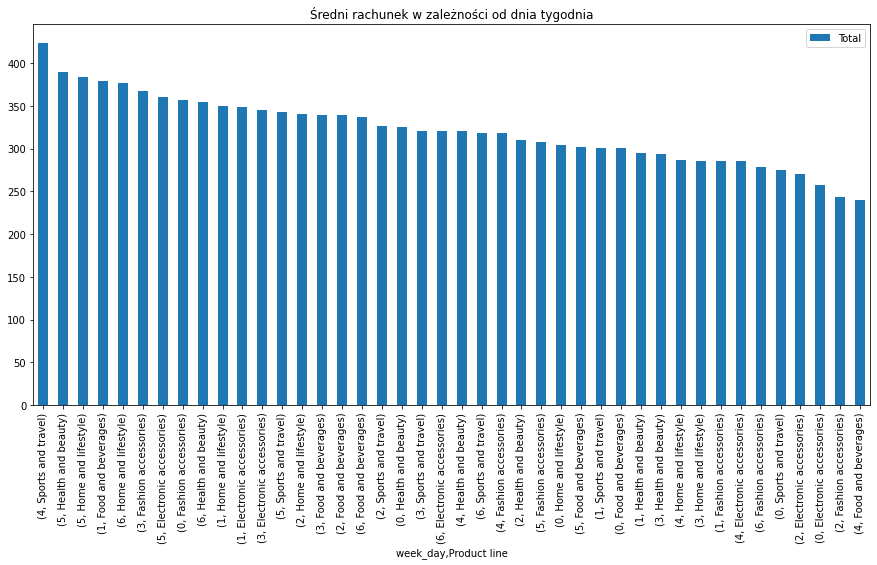

In [ ]:
# Średni rachunek w zależności od dnia tygodnia i kategorii produktu:
dane_bar = dane.groupby(["week_day", "Product line"]).agg(dict(Total = "mean")).sort_values(by = "Total", ascending = False)

dane_bar.plot(kind = "bar").set_title("Średni rachunek w zależności od dnia tygodnia")

Text(0.5, 1.0, 'Średni rachunek w zależności od dnia tygodnia')

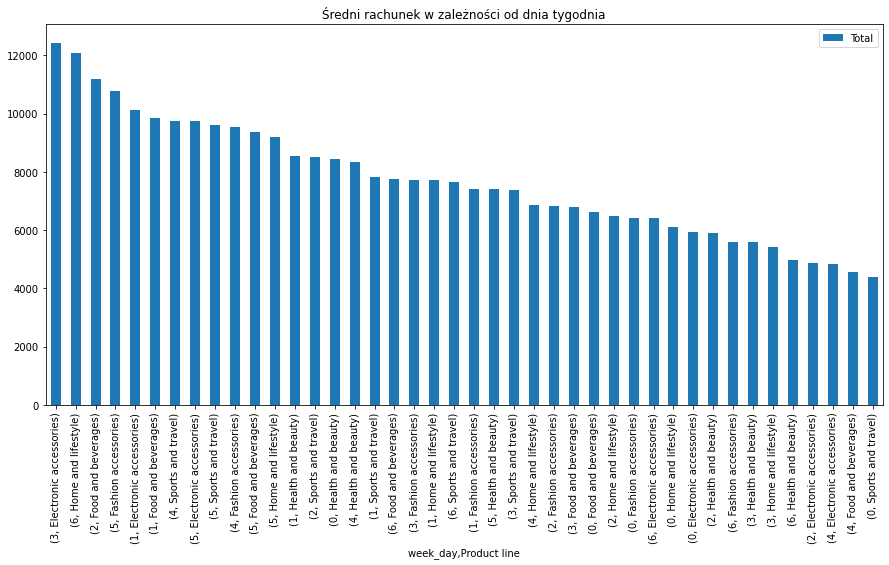

In [ ]:
# Łączny rachunek w zależności od dnia tygodnia i kategorii produktu:
dane_bar = dane.groupby(["week_day", "Product line"]).agg(dict(Total = "sum")).sort_values(by = "Total", ascending = False)

dane_bar.plot(kind = "bar").set_title("Średni rachunek w zależności od dnia tygodnia")

In [ ]:
# Kwota wydana przez klienta z podziałem na kategorie produktów, płeć i status:
wykres2 = px.box(dane,
                 x = "Customer type",
                 y = "Total",
                 color = "Product line",
                 notched = True, # Czy pokazać obserwacje?
                 facet_col = "Gender", # Dzielimy wykres na bloki
                 title = "Wysokośc rachunku z podziałem na kategorie produktów, płeć i status klienta")
wykres2.show()

In [ ]:
# Standaryzacja na zbiorze danych:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

# Pierwszy z wykresów:
hist1 = pd.DataFrame(dict(values = [1, 2, 2, 3, 3, 3, 4, 4, 5]))
px.histogram(hist1, x = "values")

In [ ]:
# Drugi zestaw danych:
hist2 = pd.DataFrame(dict(values = [1, 2, 2, 3, 3, 3, 4, 4, 5, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5],
                          flag = [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

print(hist2.groupby("flag").describe())
print("----------------------------------------------------------------------------------------------")
px.histogram(hist2, x = "values", color = "flag", barmode = "overlay")

     values                                        
      count mean       std  min  25%  50%  75%  max
flag                                               
1       9.0  3.0  1.224745  1.0  2.0  3.0  4.0  5.0
2      12.0  3.0  1.128152  1.0  2.0  3.0  4.0  5.0
----------------------------------------------------------------------------------------------


In [ ]:
# Standaryzacja - z-score.
# z = (x - średnia)/odchylenie standardowe
# Wygenerowanie zbioru danych:
np.random.seed(1) # Ziarno losowości - żeby po ponownym uruchomieniu wygenerować te same wartości

dane = np.random.randn(100)+2
ff.create_distplot([dane], ["surowy"])

In [ ]:
# Krok 1 - przesunięcie krzywej w lewo, z zachowaniem kształtu:
dane1 = dane - dane.mean() # Odejmujemy od każdej wartości wartość średnią
ff.create_distplot([dane1], ["krok -1"])

In [ ]:
# Krok 2 - przekształcenie krzywej:
dane2 = (dane - dane.mean()) / dane.std() # Dzielimy każdą z wartości przez odchylenie standardowe
ff.create_distplot([dane2], ["krok -2"])

In [ ]:
df = pd.DataFrame(dict(dane = dane2))
df.describe()

,dane
count,1.000000e+02
mean,1.443290e-16
std,1.005038e+00
min,-2.668593e+00
25%,-7.618998e-01
50%,3.944004e-03
75%,6.516674e-01
max,2.400698e+00


In [ ]:
# Testowanie hipotez:
# Co to jest hipoteza?
# Założenie: "Pomarańcze w Biedronce są drogie". Ciekawe przemyślenie, ale nie jest hipotezą, bo nie ma twardej danej, którą możnaby sprawdzić.
# Hipoteza: "Pomarańcze w Biedronce kosztują ponad 7,50 zł/kg." Już lepiej. Jest co sprawdzać.
# Hipotezą nie może być coś, co zawiera wyłącznie opinie:
# Brak danych -> Brak możliwości testu -> Nie ma hipotezy.

# Inny przykład:
# Hipoteza zerowa (H0):
hipoteza = "Przeciętne wynagrodzenie data scientista w Polsce to 12000 zł brutto."

# Hipoteza alternatywna - czyli wszystko inne (H1):
not hipoteza

# Test polega na szukaniu dowodów na odrzucenie H0
alpha = 0.05 # Poziom istotności (miara prawdopodobieństwa odrzucenia Ho)

# Test "Z":
# Z = (średnia próby - hipotetyczna średnia) / (odchylenie standardowe / sqrt(liczba obserwacji))
# Jeszcze hipoteza będzie bliska prawdy, to Z będzie coraz bliżej 0
# p-value - graniczna wartość poziomu istotności: przy p-value <= alpha - odrzucenie hipotezy H0

In [ ]:
# Testowanie hipotez - przykłady:
# Chcemy sprawdzić, czy dwa zestawy danych są do siebie podobne.
# Definiujemy hipotezy:
# H0: nie ma dużej różnicy między zbiorami X i Y.
# H1: zbiory X i Y istotnie się od siebie różnią.

# Skorzystamy z testu T-studenta:
X = np.random.randn(20).round(2)
Y = np.random.randn(20).round(2)
print("------------------------------")
print("X: ", X)
print("średnia: ", np.mean(X).round(3))
print("mediana: ", np.median(X).round(3))
print("odchylenie standardowe: ", np.std(X).round(3))
ff.create_distplot([X], ["zbiór X"]).show()
print("------------------------------")
print("Y: ", Y)
print("średnia: ", np.mean(Y).round(3))
print("mediana: ", np.median(Y).round(3))
print("odchylenie standardowe: ", np.std(Y).round(3))
ff.create_distplot([Y], ["zbiór Y"]).show()
print("------------------------------")
from scipy import stats
from statsmodels.stats import weightstats as stests

# Obliczamy p-value:
# zakładamy:
alpha = 0.05

# Przeprowadzamy test T-studenta:
stat, pvalue = stats.ttest_ind(X, Y)

print("wartość P: ", pvalue)
if pvalue < 0.05:
  print("Odrzucenie H0 na rzecz H1. Zbiory istotnie się różnią.")
else:
  print("Nie ma podstaw do odrzucenia H0. Zbiory są podobne.")

------------------------------
X:  [-0.45  1.22  0.4   0.59 -1.09  0.17  0.74 -0.95 -0.27  0.03 -1.37  0.32
  0.85 -0.86  0.35 -1.31 -0.04 -1.62  1.12  0.41]
średnia:  -0.088
mediana:  0.1
odchylenie standardowe:  0.84


------------------------------
Y:  [-0.02 -0.78  1.27  1.97 -1.86  1.24  1.63  0.34 -1.2   0.86 -0.18 -0.6
 -1.23  0.55  0.79 -0.62  0.52 -1.14  0.8   0.05]
średnia:  0.12
mediana:  0.195
odchylenie standardowe:  1.029


------------------------------
wartość P:  0.5001747304767687
Nie ma podstaw do odrzucenia H0. Zbiory są podobne.


In [ ]:
# Z-test:
dane = pd.read_csv("https://akademiadatascience.s3-eu-west-1.amazonaws.com/materialy/sds/modul3/sprzedaz.csv")
dane.sample(5) # wyświetla 5 losowych wierszy

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
683,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.148,45.108,2/27/2019,12:22,Ewallet,42.96,4.761905,2.148,6.6
461,234-03-4040,B,Mandalay,Member,Female,Food and beverages,73.05,10,36.525,767.025,3/3/2019,12:25,Credit card,730.50,4.761905,36.525,8.7
701,176-64-7711,B,Mandalay,Normal,Male,Food and beverages,32.32,3,4.848,101.808,3/27/2019,19:11,Credit card,96.96,4.761905,4.848,4.3
65,877-22-3308,A,Yangon,Member,Male,Health and beauty,15.87,10,7.935,166.635,3/13/2019,16:40,Cash,158.70,4.761905,7.935,5.8
133,590-83-4591,B,Mandalay,Member,Male,Electronic accessories,87.45,6,26.235,550.935,2/17/2019,14:40,Credit card,524.70,4.761905,26.235,8.8


In [ ]:
# Z-test:
# Sprawdzamy, czy kwoty zakupów dokonywanych przez klientów obu płci różnią się między sobą:
female = dane[dane["Gender"] == "Female"]
male = dane[dane["Gender"] == "Male"]

# H0: Nie ma dużej różnicy między kwotami zakupów dokonywanych przez kobiety i mężczyzn,
# H1: Kwoty zakupów dokonywanych przez kobiety i mężczyzn istotnie się różnią.

# Tezt "Z":
stat, pvalue = stests.ztest(female["Total"],
                            x2 = male["Total"],
                            alternative = "two-sided")

print("wartość P: ", pvalue)
if pvalue < alpha:
  print("Odrzucenie H0 na rzecz H1. Kwoty zakupów kobiet i mężczyzn istotnie się różnią.")
else:
  print("Nie ma podstaw do odrzucenia H0. Kobiety wydają niemal tyle samo co mężczyźni.")

wartość P:  0.11778783052715452
Nie ma podstaw do odrzucenia H0. Kobiety wydają niemal tyle samo co mężczyźni.


In [ ]:
# Kolejny Z-test:
# Sprawdzamy, czy średnia kwota na rachunku jest nie większa niż $ 300:

# H0: Średnia kwota wydana na zakupy nie przekracza 300 USD.
# H1: Średnia kwota wydana na zakupy przekracza 300 USD.

alpha = 0.05

stat, pvalue = stests.ztest(dane["Total"], value = 300, alternative = "larger") # Test prawostronny
print("wartość P: ", pvalue)
if pvalue < alpha:
  print("Odrzucenie H0 na rzecz H1. Średni rachunek za zakupy jest wyższy niż $ 300.")
else:
  print("Nie ma podstaw do odrzucenia H0. Średni rachunek za zakupy jest nie wyższy niż $ 300.")

print("-----------------------------------")
dane["Total"].describe()

wartość P:  0.0015699276238656976
Odrzucenie H0 na rzecz H1. Średni rachunek za zakupy jest wyższy niż $ 300.
-----------------------------------


count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64